In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns = titanic.columns.str.lower()

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
titanic[titanic.duplicated('passengerid')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


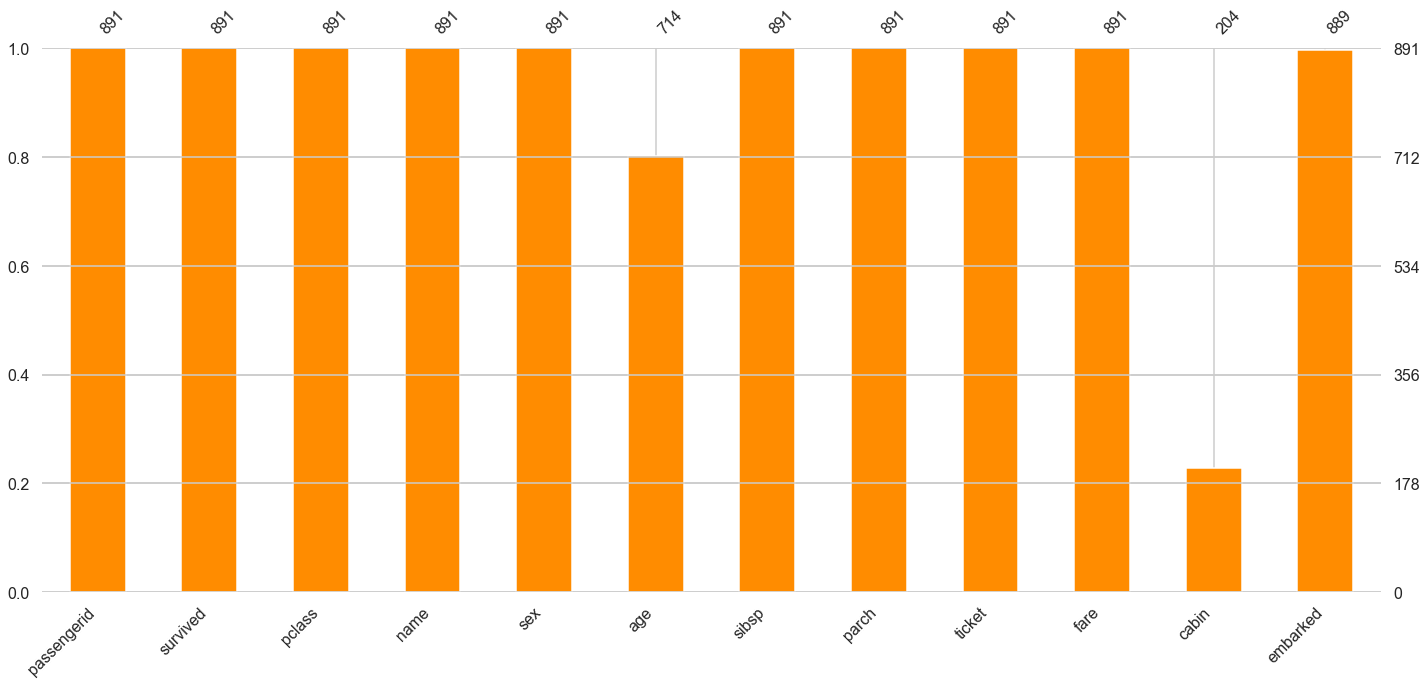

In [7]:
import missingno as msno 

msno.bar(titanic, color='darkorange')

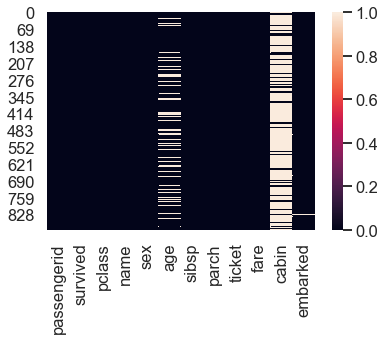

In [8]:
sns.heatmap(titanic.isnull())

In [9]:
titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [10]:
titanic.groupby(['pclass', 'sex'])['age'].median()

pclass  sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: age, dtype: float64

In [11]:
titanic['age'] = titanic.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))

In [12]:
titanic.embarked.fillna('S', inplace=True)

In [13]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [15]:
le = LabelEncoder()
titanic['label_encoder'] = le.fit_transform(titanic.pclass)

In [16]:
encoder = OneHotEncoder()
az = encoder.fit_transform(titanic.label_encoder.values.reshape(-1,1)).toarray()
onehot = pd.DataFrame(az)
df = pd.concat([titanic, onehot], axis=1)
df.rename(columns={0: 'pclass_1', 1: 'pclass_2', 2: 'pclass_3'}, inplace=True)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,label_encoder,pclass_1,pclass_2,pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.0,0.0,1.0


In [17]:
from category_encoders import TargetEncoder

In [18]:
tencoder = TargetEncoder()
df['embarked_prob_survived'] = tencoder.fit_transform(df.embarked, df.survived)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0,0.0,1.0,0.339009
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0,0.0,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,0.0,1.0,0.339009
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1.0,0.0,0.0,0.339009
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.0,0.0,1.0,0.339009


In [19]:
dummy = pd.concat([pd.get_dummies(df.sex), pd.get_dummies(df.embarked)], axis=1)
data = pd.concat([df, dummy], axis=1)
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0.0,0.0,1.0,0.339009,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1.0,0.0,0.0,0.553571,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2,0.0,0.0,1.0,0.339009,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1.0,0.0,0.0,0.339009,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,2,0.0,0.0,1.0,0.339009,0,1,0,0,1


In [30]:
clean_data = data.drop(['name', 'sex', 'ticket', 'cabin', 'embarked'], axis=1)
clean_data.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.339009,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,0.553571,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,2,0.0,0.0,1.0,0.339009,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,1.0,0.0,0.0,0.339009,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.339009,0,1,0,0,1


In [31]:
clean_data.drop('female', axis=1, inplace=True)

In [ ]:
clean_data.drop('passengerid', axis=1, inplace=True)

In [50]:
clean_data.drop('pclass', axis=1, inplace=True)
clean_data.head()

,survived,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,male,C,Q,S
0,0,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.339009,1,0,0,1
1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,0.553571,0,1,0,0
2,1,26.0,0,0,7.9250,2,0.0,0.0,1.0,0.339009,0,0,0,1
3,1,35.0,1,0,53.1000,0,1.0,0.0,0.0,0.339009,0,0,0,1
4,0,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.339009,1,0,0,1


In [52]:
abs(clean_data.corr()['survived']).drop('survived').sort_values(ascending=False)

male                      0.543351
label_encoder             0.338481
pclass_3                  0.322308
pclass_1                  0.285904
fare                      0.257307
embarked_prob_survived    0.170707
C                         0.168240
S                         0.149683
pclass_2                  0.093349
parch                     0.081629
age                       0.059579
sibsp                     0.035322
Q                         0.003650
Name: survived, dtype: float64

In [53]:
import statsmodels.api as sm

In [54]:
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        
        r_squared = sm.OLS(y,x).fit().rsquared
        
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [55]:
calculate_vif(clean_data)

<ipython-input-54-2f273682d8e6>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)


,Var,Vif
5,label_encoder,inf
6,pclass_1,inf
7,pclass_2,inf
8,pclass_3,inf
9,embarked_prob_survived,inf
11,C,inf
12,Q,inf
13,S,inf
4,fare,1.77
0,survived,1.67


In [43]:
data = clean_data.copy()
data.head()

,survived,pclass,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,male,C,Q,S
0,0,3,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.339009,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,0.553571,0,1,0,0
2,1,3,26.0,0,0,7.9250,2,0.0,0.0,1.0,0.339009,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1.0,0.0,0.0,0.339009,0,0,0,1
4,0,3,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.339009,1,0,0,1


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer

In [45]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression())]

pipe = Pipeline(steps)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.8071748878923767

In [46]:
cv = cross_val_score(pipe, X, y, cv=5)
cv.mean()

0.8036218693114054

In [47]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report)
report_df.T

,precision,recall,f1-score,support
0,0.801418,0.882812,0.840149,128.000000
1,0.817073,0.705263,0.757062,95.000000
accuracy,0.807175,0.807175,0.807175,0.807175
macro avg,0.809246,0.794038,0.798605,223.000000
weighted avg,0.808087,0.807175,0.804753,223.000000


In [48]:
prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, prob)

roc_auc = auc(fpr, tpr)

<function matplotlib.pyplot.show(*args, **kw)>

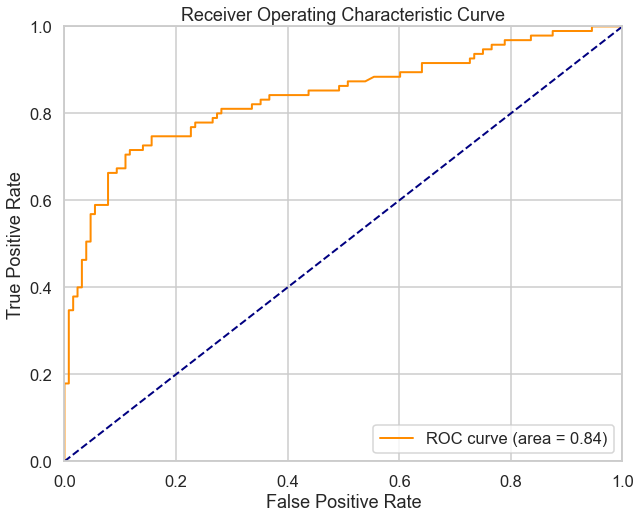

In [49]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.set_context('talk')

plt.plot(fpr, tpr, color='darkorange', lw = 2, label='ROC curve (area = %.2f)' %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show